# Sparse Hebbian Learning : reproducing SparseNet

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
from copy import deepcopy

In [2]:
from shl_scripts.shl_experiments import SHL_set
tag = 'Olshausen'
opts = dict(homeo_method=tag, eta_homeo=0.05, alpha_homeo=0.02, verbose=0)
experiments = SHL_set(opts, tag=tag)
list_figures = []
list_figures = ['show_dico']

In [3]:
!ls -ltr {shl.data_cache}/{tag}*

ls: {shl.data_cache}/{tag}*: No such file or directory


## Homeostasis à-la-SparseNet

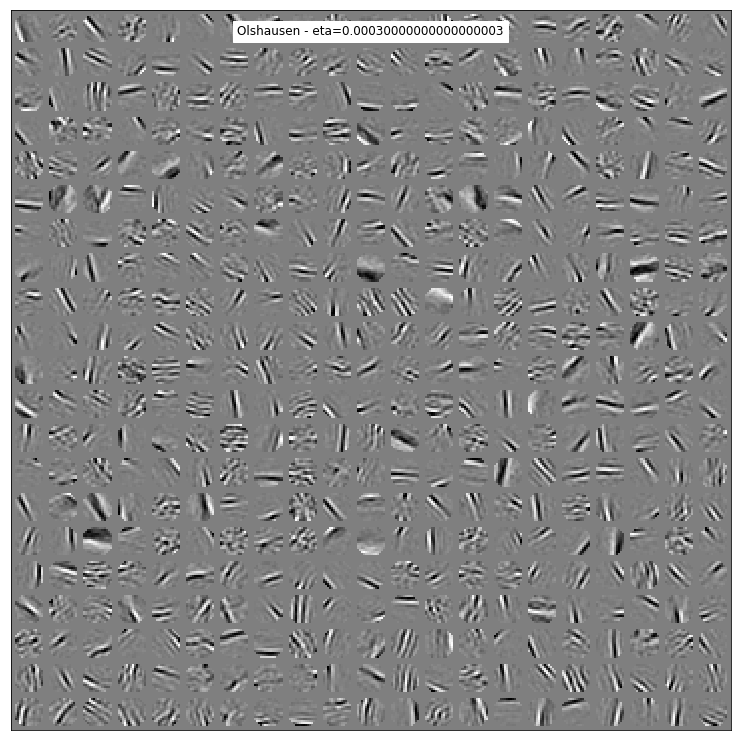

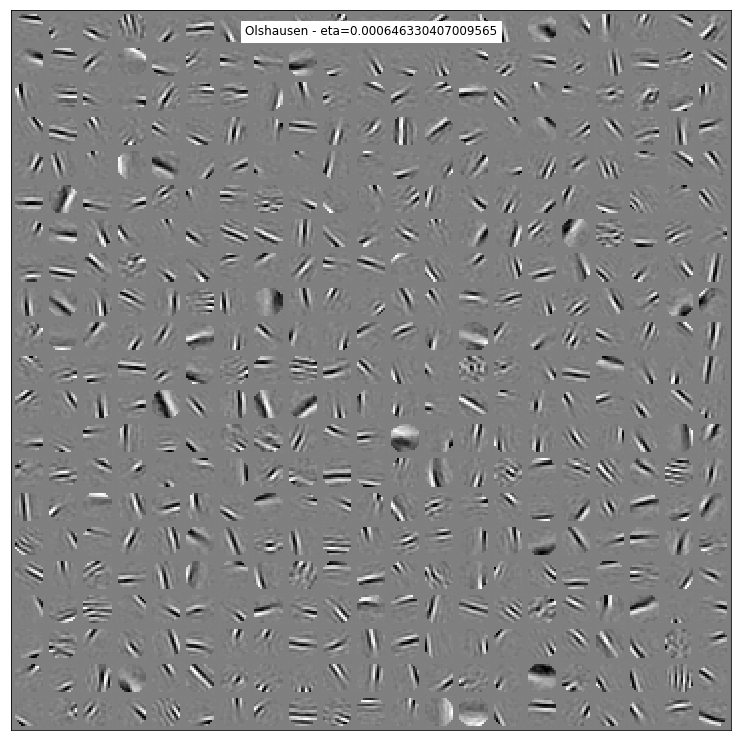

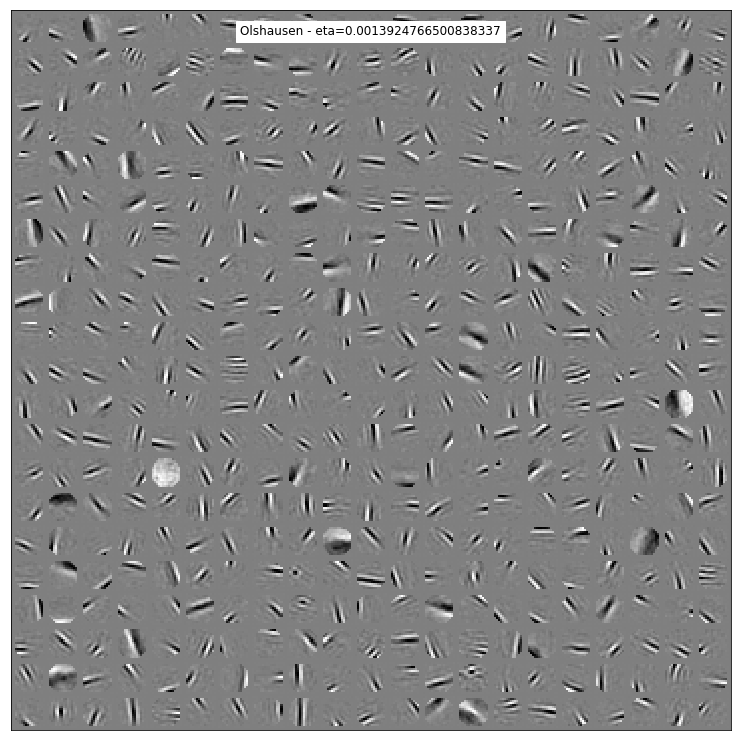

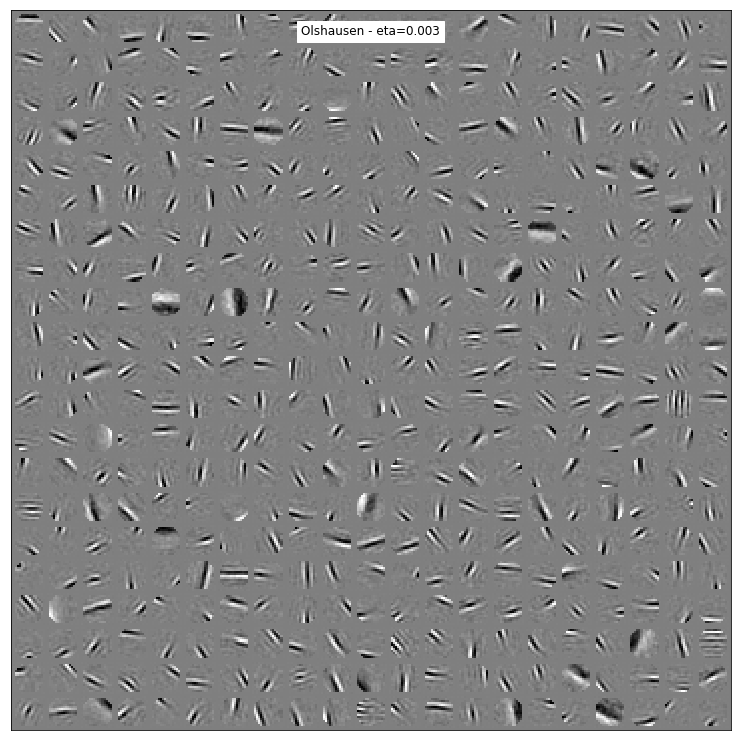

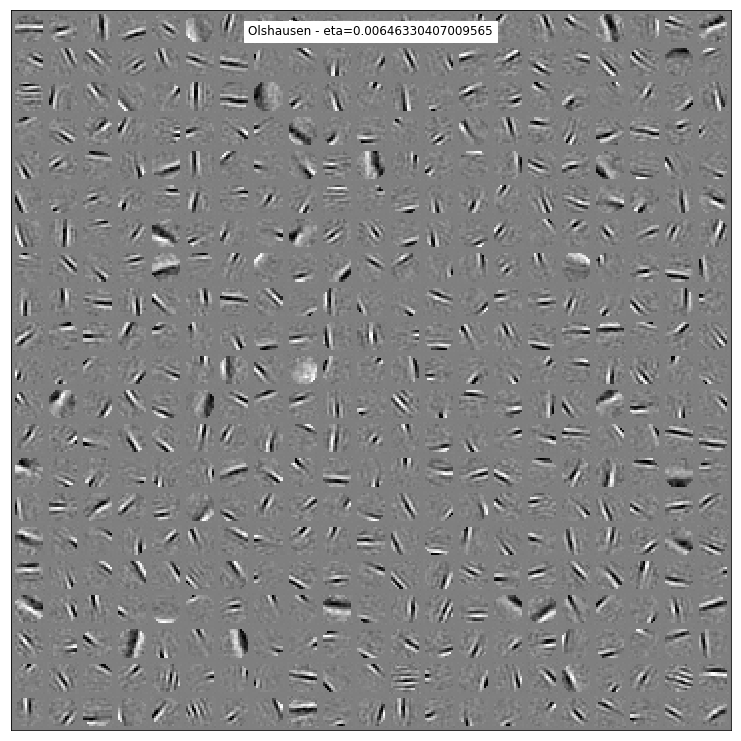

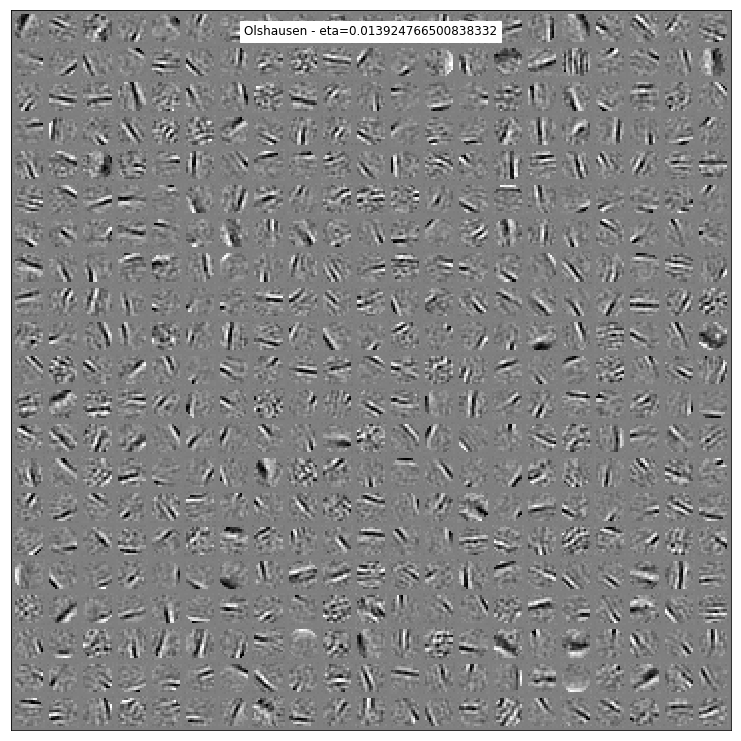

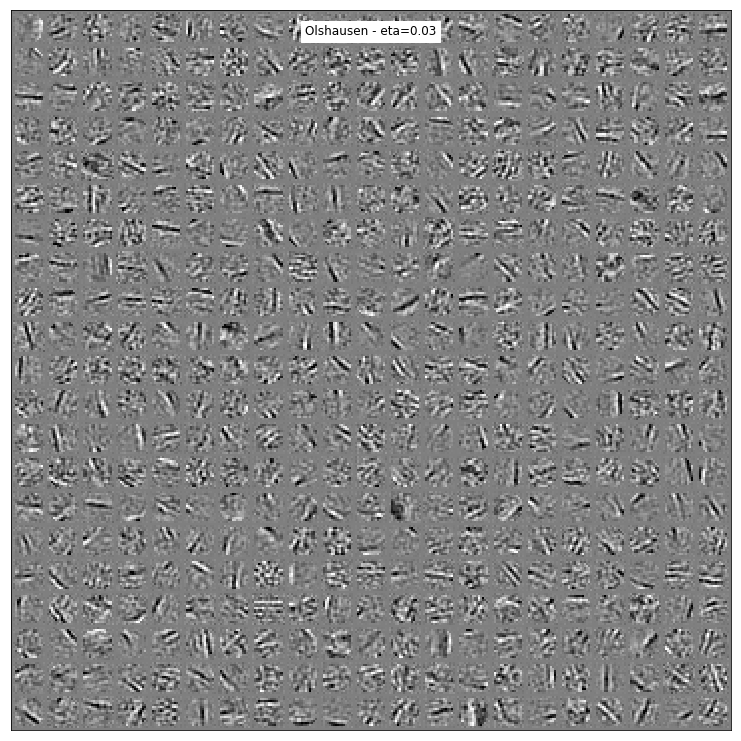

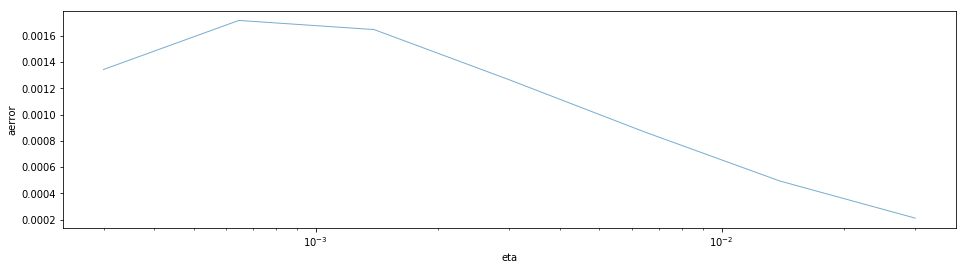

In [ ]:
experiments.scan(variable='eta', list_figures=list_figures, display='')
fig, ax = experiments.scan(variable='eta', list_figures=[], display='final')   

In [ ]:
experiments.scan(variable='eta_homeo', list_figures=list_figures, display='')
fig, ax = experiments.scan(vtype='homeo_params', variable='eta_homeo', list_figures=[], display='final')

In [ ]:
experiments.scan(variable='alpha_homeo', list_figures=list_figures, display='')
fig, ax = experiments.scan(vtype='homeo_params', variable='alpha_homeo', list_figures=[], display='final')

## comparing the result of learning with different sparse algorithms

In [ ]:
for algorithm in ['lasso_lars', 'lasso_cd', 'lars', 'threshold', 'omp', 'mp']:
    experiments = SHL_set(opts, tag=tag + ' - algorithm={}'.format(algorithm))
    experiments.scan(variable='eta', list_figures=list_figures, display='')
    fig, ax = experiments.scan(variable='eta', list_figures=[], display='final')   

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts